## Imports

In [3]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time

## Pure python function

In [4]:
def solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u
               
    return 0

## Numba accelerator

In [5]:
def solve_2d_linearconv_numba(u, un, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u
               
    return 0

## Pyccel accelerator

In [6]:
def solve_2d_linearconv_pyccel(u, un, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u and v
               
    return 0

## Inputs

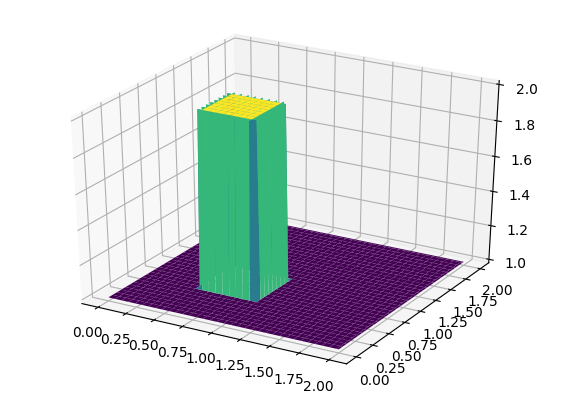

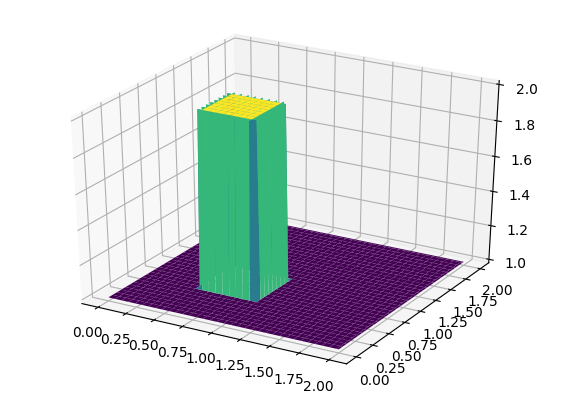

In [7]:
###variable declarations
nx = 101
ny = 101
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u0 = np.ones((ny, nx)) ##create a 1xn vector of 1's
u0[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
u = u0.copy()
un = np.ones((ny, nx)) 

solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

## Call Funtions

### Pure function

In [11]:
%timeit solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c)

3.82 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [12]:
%timeit solve_2d_linearconv_numba(u, un, nt, dt, dx, dy, c)

77.8 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [13]:
solve_2d_linearconv_f90 = epyccel(solve_2d_linearconv_pyccel)

In [14]:
%timeit solve_2d_linearconv_f90(u, un, nt, dt, dx, dy, c)

152 ms ± 5.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
